## Intro: 
 
We have three species of Penguins: Chinstrap, Gentoo, and Adelie. The data were originally collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. we will focus on the length and depth of the penguins’ bills. We’ll attempt to use these measurements to predict the species of each penguin.

In [21]:
## Methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

In [22]:
penguins_train = pd.read_csv("https://cs307.org/lab-00/data/penguins-train.csv")
penguins_test = pd.read_csv("https://cs307.org/lab-00/data/penguins-test.csv")

The Palmer Penguins dataset includes size measurements for adult foraging penguins near 
Palmer Station, Antarctica. The data includes measurements for penguin species, island
in Palmer Archipelago, size (flipper length, body mass, bill dimensions), and sex.

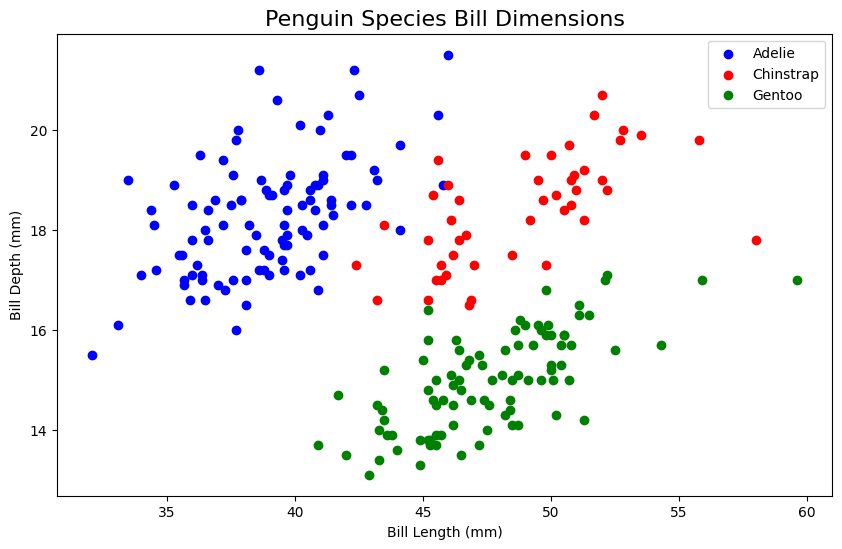

In [23]:
## Visualization
adelie = penguins_train[penguins_train['species'] == 'Adelie']
chinstrap = penguins_train[penguins_train['species'] == 'Chinstrap']
gentoo = penguins_train[penguins_train['species'] == 'Gentoo']

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(adelie['bill_length_mm'], adelie['bill_depth_mm'], color='blue', label='Adelie')
plt.scatter(chinstrap['bill_length_mm'], chinstrap['bill_depth_mm'], color='red', label='Chinstrap')
plt.scatter(gentoo['bill_length_mm'], gentoo['bill_depth_mm'], color='green', label='Gentoo')

# Adding titles and labels
plt.title('Penguin Species Bill Dimensions', fontdict={'fontsize': 16})
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Show the legend
plt.legend()
# Display the plot
plt.show()

# Test Statistics:
The statistics of the 3 species of penguins' counter & proportions, mean and standard deviation of bill depth and bill length are accurately reflected in the graph "penguin Species Bill Dimensions".

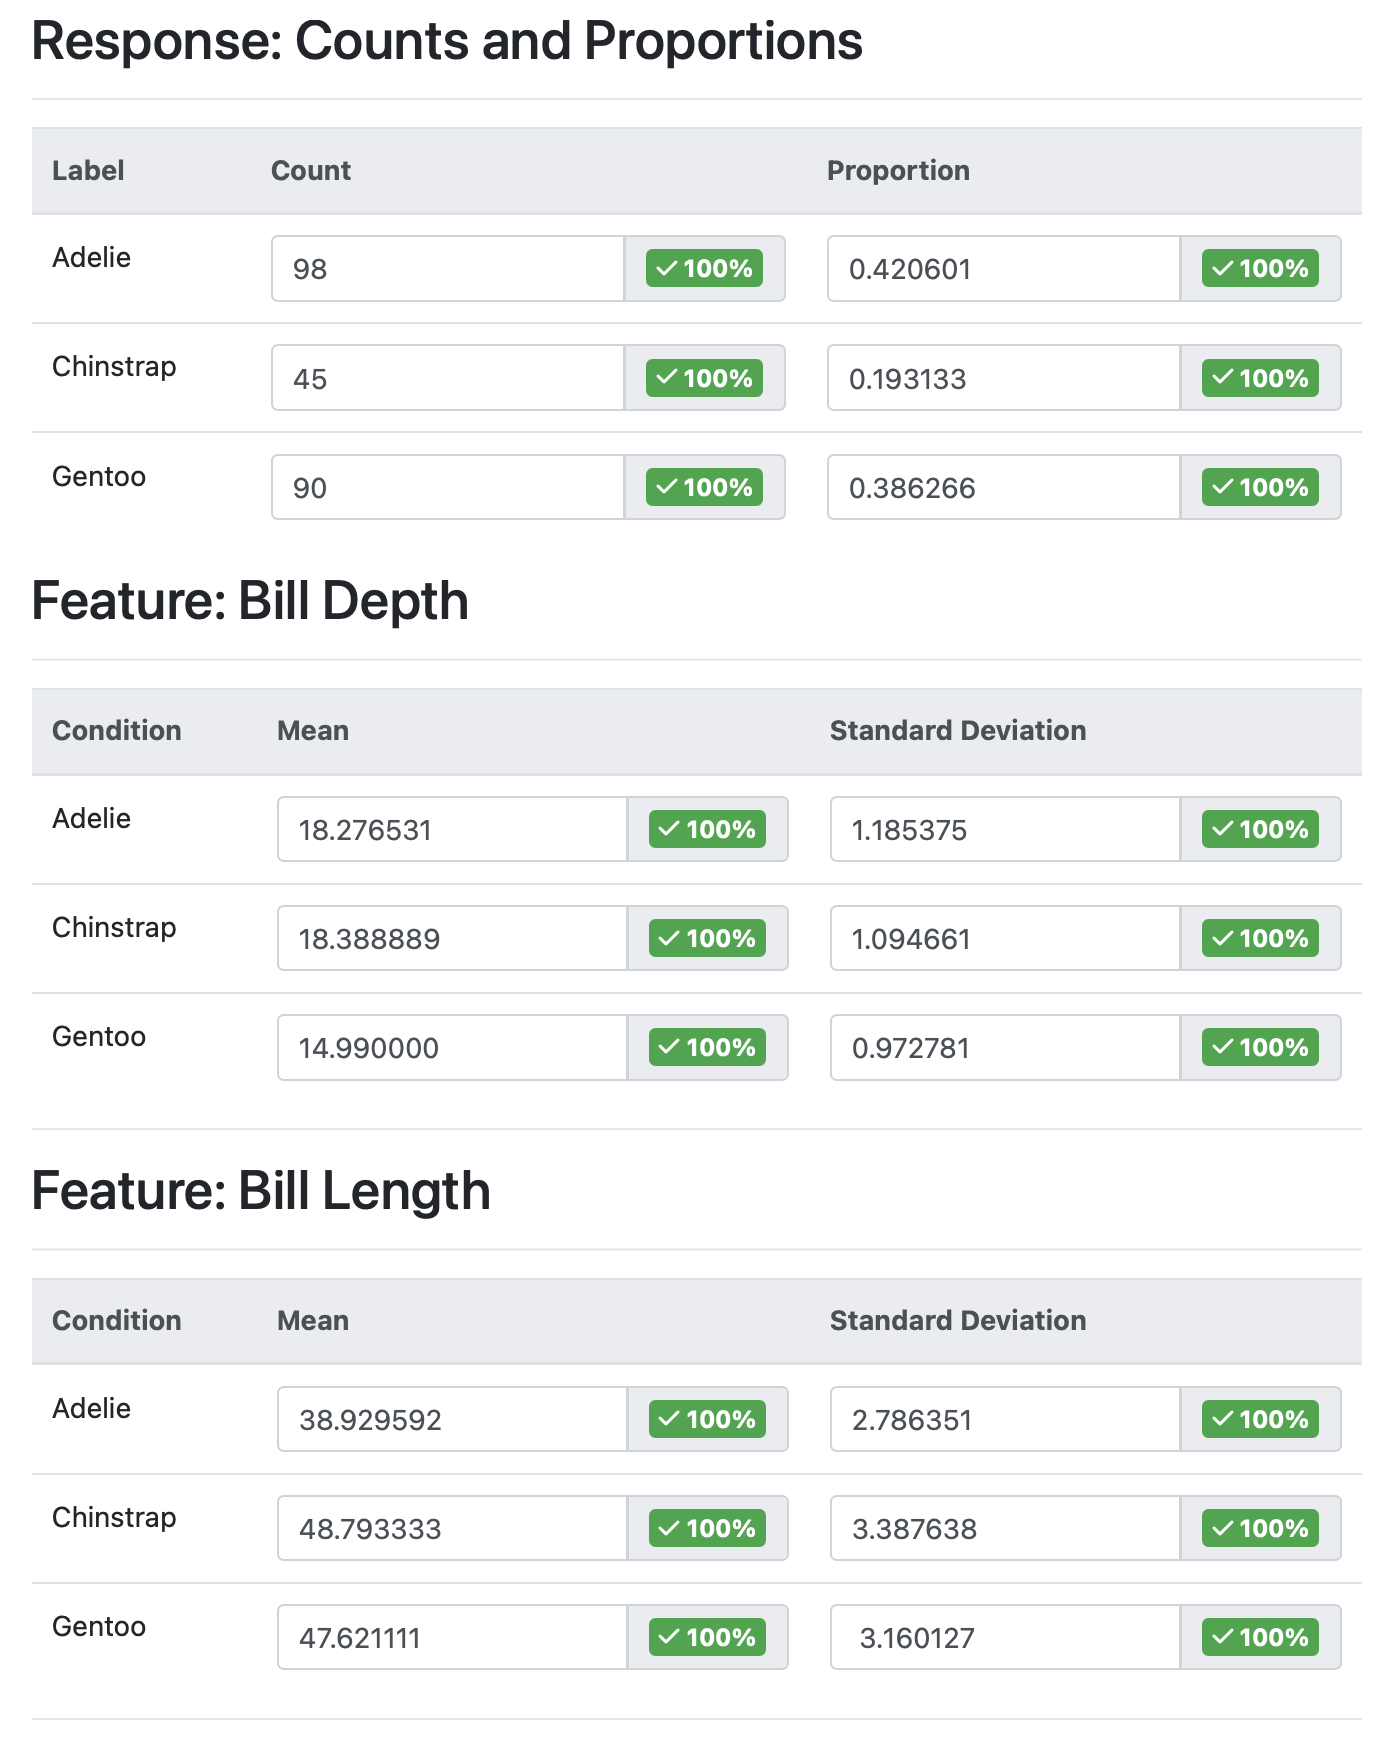

We use one database to train a model on the bill_depth_mm and bill_length_mm of each different penguins. And then we use another database with the same keys to predict the accuracy of our model.


In [24]:
## process data for ML
X_train = penguins_train[["bill_length_mm","bill_depth_mm"]]
Y_train = penguins_train["species"]
X_test = penguins_test[["bill_length_mm","bill_depth_mm"]]
Y_test = penguins_test["species"]

## train models
dummy_clf = DummyClassifier()
dt_clf = DecisionTreeClassifier()
dummy_clf.fit(X_train, Y_train)
dt_clf.fit(X_train, Y_train) 

DecisionTreeClassifier()

# Results:  

In [25]:
## Report model metrics
print(np.mean(Y_test.to_numpy() == dummy_clf.predict(X_test))) ## = 0.48
print(np.mean(Y_test.to_numpy() == dt_clf.predict(X_test))) # = 0.94

# save models
dump(dummy_clf, "penguins-dummy.joblib")
dump(dt_clf, "penguins-dt.joblib")

0.48
0.94


['penguins-dt.joblib']

# Discussion: 
Our dummy classifier model provides a baseline accuracy, and we see that our actual model performs significantly better: at an accuracy of 94%. 

# Conclusion:
We shouldn't use this model because 94% accuracy is too low. We need to improve our model's effectiveness.




